# 决策树
## 决策树的构造：
### Feature: 
#### Pros:
    -计算复杂度不高
    -输出结果易于理解
    -对中间值的缺失不敏感
    -可以处理不相关特征数据
#### Cons：
    -可能会产生过度匹配问题
#### Suiteable Data Type:
    -数值型和标称型
    
#### 创建分支的伪代码函数createBranch()如下：
    If so return ClassTag
    Else
        find the best feature to devide the dataset.
        divide the dataset
        create branch
            for every divided sub-set
                use createBranch and add the result returned to branch
        return branch

### 决策树的一般流程：
    1. Data collecting: Any method
    2. Data preparation: tree generation algorithm only suits for nominal data, so the numeric data should be discretized.
    3. Data analysis: Any method. After tree generation, we should check the figure whether it fits for our prediction.
    4. train algorithm: tree generation data structure.
    5. test algorithm: use experience tree to calculate error rate.
    6. use algorithm: this process is suitable for all supervised learning algorithm. Using decision tree could help better understand the inner meaning of the data.
   
### 信息增益 Information Gain

- Information: $l(x_i)=-log_2p(x_i)$

- Entropy（熵）: $H = -\sum^n_{i=1}p(x_i)log_2p(x_i)$

### 递归构建决策树
1. 导入原始数据集
2. 基于最好的属性值划分数据集
3. 数据向下传递到树分支的下一个节点，再次划分
##### 递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子节点或者终止块。
##### 任何到达叶子节点的数据必然属于叶子节点的分类。




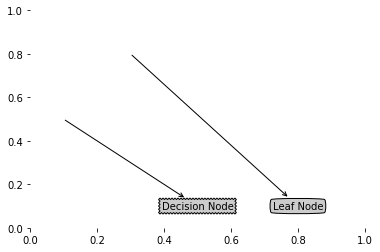

{'no surfacing': {0: 'N', 1: {'flippers': {0: 'N', 1: 'Y'}}}}


In [4]:
from math import log
import operator


def calcShannonEnt(dataSet):
    '''
    Func : Calculate the Shannon Entropy for a given dataSet 
    '''
    numEntries = len(dataSet)
    labelCounts = {}
    #create dict for every possible category
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] +=1
    shannonEnt = 0.0
    #probability, and log(prob), sum 
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

def createDataSet():
    dataSet = [[1,1,'Y'],
            [1,1,'Y'],
            [1,0,'N'],
            [0,1,'N'],
            [0,1,'N']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

def splitDataSet(dataSet, axis, value):
    '''
    Func: divide the dataset based on given feature
    '''
    # create new list object 
    retDataSet = []
    for featVec in dataSet:
        # Extraction
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] #extract the data from dataset where the given feature has given value
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    '''
    choose the best feature to split
    '''
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0 ; bestFeature = -1
    #create unique feature list
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)# change list to set, keep unique keys.
        newEntropy = 0.0
        #calculate Entropy for every split way.
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        #get bestInfoGain
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote]=0
        classCount[vote] += 11
    sortedClassCount = sorted(classCount.items(),\
     key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    #类别完全相同则停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #遍历玩所有特征时返回出现次数最多的类别
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    #得到列表包含的所有属性值
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                        (dataSet,bestFeat,value),subLabels)
    return myTree

def getNumLeafs(myTree):
    '''get the number of leaf nodes'''
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ =='dict':
            this.Depth = 1 + getTreeDepth(secondDict[key])
        else: this.Depth = 1
        if thisDepth > maxDepth : maxDepth = thisDepth
    return maxDepth



def main():
    reload(treePlotter)
    dataSet, labels = createDataSet()
    myTree = createTree(dataSet,labels)
    print(myTree)
    
if __name__ =="__main__":
	main()


    

##### list.extend and list.append
    -if there is two lists a and b
    -a.append(b) means add the whole list b as one element in list a
    -a.extend(b) means add all the elements in list b in list a 

In [ ]:
from math import log
import operator

def calcShannonEnt(dataSet):
    '''
    Func : Calculate the Shannon Entropy for a given dataSet 
    '''
    numEntries = len(dataSet)
    labelCounts = {}
    #create dict for every possible category
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] +=1
    shannonEnt = 0.0
    #probability, and log(prob), sum 
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

def createDataSet():
    dataSet = [[1,1,'Y'],
            [1,1,'Y'],
            [1,0,'N'],
            [0,1,'N'],
            [0,1,'N']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

def splitDataSet(dataSet, axis, value):
    '''
    Func: divide the dataset based on given feature
    '''
    # create new list object 
    retDataSet = []
    for featVec in dataSet:
        # Extraction
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] #extract the data from dataset where the given feature has given value
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    '''
    choose the best feature to split
    '''
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0 ; bestFeature = -1
    #create unique feature list
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)# change list to set, keep unique keys.
        newEntropy = 0.0
        #calculate Entropy for every split way.
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        #get bestInfoGain
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote]=0
        classCount[vote] += 11
    sortedClassCount = sorted(classCount.items(),\
     key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    #类别完全相同则停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #遍历玩所有特征时返回出现次数最多的类别
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    #得到列表包含的所有属性值
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                        (dataSet,bestFeat,value),subLabels)
    return myTree

def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
    	if testVec[featIndex] == key:
    		if type(secondDict[key]).__name__ == 'dict':
    			classLabel = classify(secondDict[key],featLabels,testVec)
    		else: 	classLabel = secondDict[key]
    return classLabel

def storeTree(inputTree,filename):
	import pickle
	#fw = open(filename, 'wb')
	#pickle.dump(inputTree,fw)
	#fw.close()
	with open(filename, 'wb') as fw:
		pickle.dump(inputTree,fw)



def grabTree(filename):
	import pickle
	fr = open(filename,'rb')
	return pickle.load(fr)

def main():
    pass
    
if __name__ =="__main__":
    main()

{'tearRate': {'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}, 'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}}}, 'reduced': 'no lenses'}}


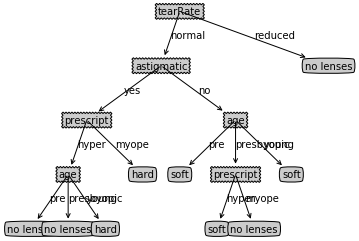

In [4]:
import trees
import treePlotter
fr=open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels=['age','prescript','astigmatic','tearRate']
lensesTree = trees.createTree(lenses,lensesLabels)
print(lensesTree)
treePlotter.createPlot(lensesTree)